In [35]:
import pandas as pd
import numpy as np

#Plots
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
#Nicer style
style.use('seaborn') 

#Wordcloud
from wordcloud import WordCloud, STOPWORDS

#Work with text
from nltk.tokenize import RegexpTokenizer
import re #regexp


#Progress bars
from tqdm import tqdm
tqdm.pandas()

#Paralelize pandas apply on multiple cores
import swifter

import random

# Descripción del dataset

El dataset descargado es [Fake News Corpus](https://github.com/several27/FakeNewsCorpus). 
Este es un dataset abierto que se sigue actualizando dirariamente en base a los datos de [OpenSources.co](http://www.opensources.co/), que es una lista de noticias etiquetadas por un equipo de investigadores de la Univerisdad Merrimack. Hay 12 categorías y son las siguientes:

* **Fake News (tag fake)** Sources that entirely fabricate information, disseminate deceptive content, or grossly distort actual news reports

* **Satire (tag satire)** Sources that use humor, irony, exaggeration, ridicule, and false information to comment on current events.

* **Extreme Bias (tag bias)** Sources that come from a particular point of view and may rely on propaganda, decontextualized information, and opinions distorted as facts.

* **Conspiracy Theory (tag conspiracy):** Sources that are well-known promoters of kooky conspiracy theories.

* **Rumor Mill (tag rumor)** Sources that traffic in rumors, gossip, innuendo, and unverified claims.

* **State News (tag state)** Sources in repressive states operating under government sanction.

* **Junk Science (tag junksci)** Sources that promote pseudoscience, metaphysics, naturalistic fallacies, and other scientifically dubious claims.

* **Hate News (tag hate)** Sources that actively promote racism, misogyny, homophobia, and other forms of discrimination.

* **Clickbait (tag clickbait)** Sources that provide generally credible content, but use exaggerated, misleading, or questionable headlines, social media descriptions, and/or images.

* **Proceed With Caution (tag unreliable)** Sources that may be reliable but whose contents require further verification.

* **Political (tag political)** Sources that provide generally verifiable information in support of certain points of view or political orientations.

* **Credible (tag reliable)** Sources that circulate news and information in a manner consistent with traditional and ethical practices in journalism (Remember: even credible sources sometimes rely on clickbait-style headlines or occasionally make mistakes. No news organization is perfect, which is why a healthy news diet consists of multiple sources of information).

La versión usada en este trabajo tiene **8.529.194 entradas** y pesa **27GB**


### Cargamos las primeras 20.000 filas del dataset.

In [8]:
news = pd.read_csv('../data/news_sampled.csv', nrows=20_000)
#Select only relevant columns
news = news[['type', 'content', 'title']]
#Remove columns with NaNs 
news = news.dropna()

In [9]:
news.head(3)

,type,content,title
0,rumor,"Life is an illusion, at least on a quantum lev...",Is life an ILLUSION? Researchers prove 'realit...
1,unreliable,"“When the police finally left the campus, arou...",Black Agenda Report
2,conspiracy,\n\nSpeaking Engagement Request\n\n\n\nContact...,Request Speaking Engagement


# Análisis lingüístico

### Número de noticias por tipo

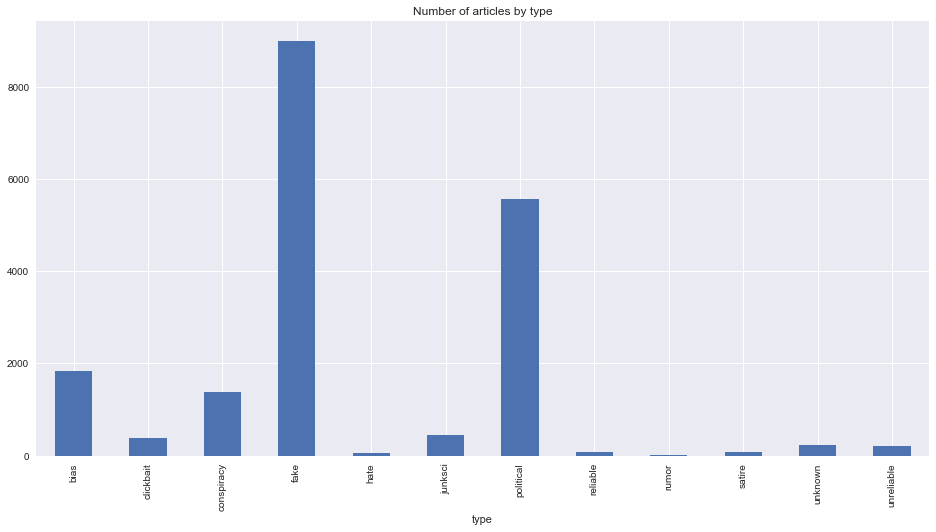

In [21]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.groupby("type").count()['content'].plot.bar(title = "Number of articles by type", ax = ax)

### Palabras más frecuentes por tipo de noticia

#### En el título

In [22]:
#stop_words = set(STOPWORDS)
#stop_words.add(('one, two, three, will'))
stop_words = STOPWORDS

Text(0.5, 1.0, "WordCloud for 'conspiracy'")

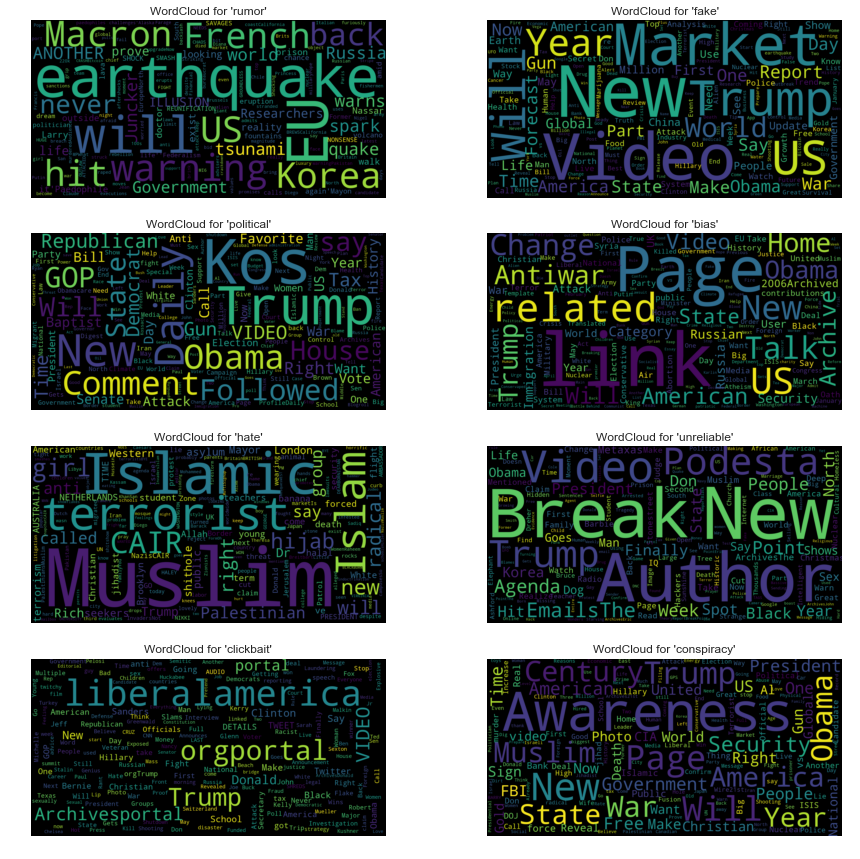

In [32]:
fig, ax = plt.subplots(4,2, figsize=(15,15))

corpus_text = ''.join(news[news['type'] == 'rumor']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[0,0].imshow(wordcloud, interpolation='bilinear')
ax[0,0].axis("off")
ax[0,0].set_title("WordCloud for 'rumor'")

corpus_text = ''.join(news[news['type'] == 'fake']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[0,1].imshow(wordcloud, interpolation='bilinear')
ax[0,1].axis("off")
ax[0,1].set_title("WordCloud for 'fake'")


corpus_text = ''.join(news[news['type'] == 'political']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[1,0].imshow(wordcloud, interpolation='bilinear')
ax[1,0].axis("off")
ax[1,0].set_title("WordCloud for 'political'")


corpus_text = ''.join(news[news['type'] == 'bias']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[1,1].imshow(wordcloud, interpolation='bilinear')
ax[1,1].axis("off")
ax[1,1].set_title("WordCloud for 'bias'")


corpus_text = ''.join(news[news['type'] == 'hate']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[2,0].imshow(wordcloud, interpolation='bilinear')
ax[2,0].axis("off")
ax[2,0].set_title("WordCloud for 'hate'")


corpus_text = ''.join(news[news['type'] == 'unreliable']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[2,1].imshow(wordcloud, interpolation='bilinear')
ax[2,1].axis("off")
ax[2,1].set_title("WordCloud for 'unreliable'")

corpus_text = ''.join(news[news['type'] == 'clickbait']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[3,0].imshow(wordcloud, interpolation='bilinear')
ax[3,0].axis("off")
ax[3,0].set_title("WordCloud for 'clickbait'")


corpus_text = ''.join(news[news['type'] == 'conspiracy']['title'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[3,1].imshow(wordcloud, interpolation='bilinear')
ax[3,1].axis("off")
ax[3,1].set_title("WordCloud for 'conspiracy'")

#### En el contenido

In [33]:
#stop_words = set(STOPWORDS)
#stop_words.add(('one, two, three, will'))
stop_words = STOPWORDS

Text(0.5, 1.0, "WordCloud for 'conspiracy'")

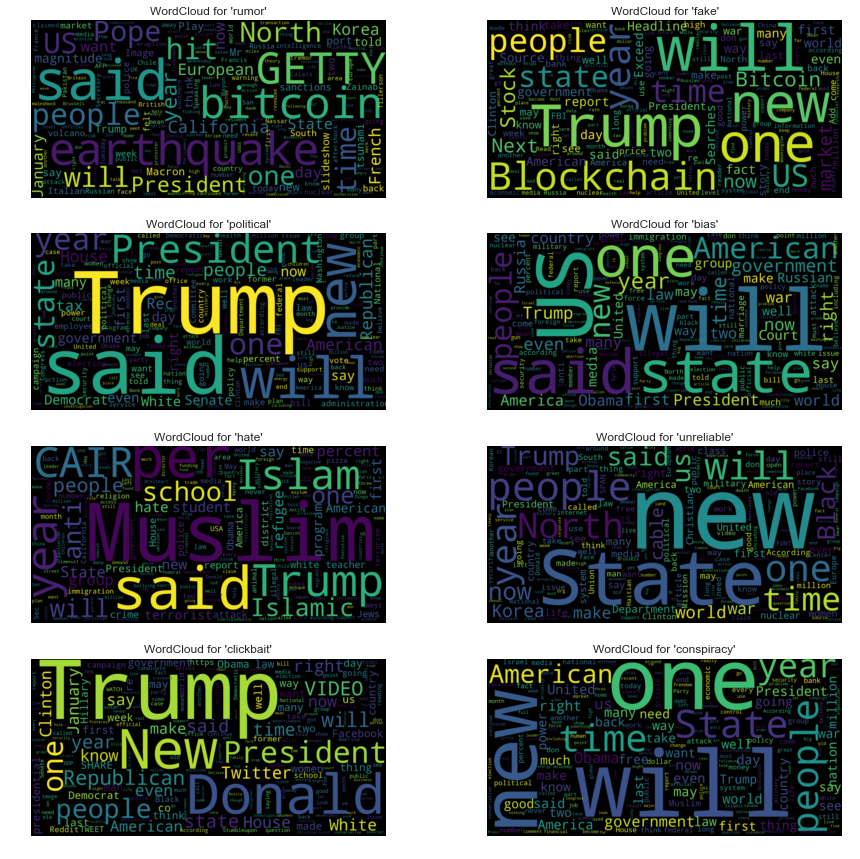

In [34]:
fig, ax = plt.subplots(4,2, figsize=(15,15))

corpus_text = ''.join(news[news['type'] == 'rumor']['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[0,0].imshow(wordcloud, interpolation='bilinear')
ax[0,0].axis("off")
ax[0,0].set_title("WordCloud for 'rumor'")

corpus_text = ''.join(news[news['type'] == 'fake'].head(900)['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[0,1].imshow(wordcloud, interpolation='bilinear')
ax[0,1].axis("off")
ax[0,1].set_title("WordCloud for 'fake'")


corpus_text = ''.join(news[news['type'] == 'political'].head(900)['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[1,0].imshow(wordcloud, interpolation='bilinear')
ax[1,0].axis("off")
ax[1,0].set_title("WordCloud for 'political'")


corpus_text = ''.join(news[news['type'] == 'bias'].head(900)['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[1,1].imshow(wordcloud, interpolation='bilinear')
ax[1,1].axis("off")
ax[1,1].set_title("WordCloud for 'bias'")


corpus_text = ''.join(news[news['type'] == 'hate']['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[2,0].imshow(wordcloud, interpolation='bilinear')
ax[2,0].axis("off")
ax[2,0].set_title("WordCloud for 'hate'")


corpus_text = ''.join(news[news['type'] == 'unreliable']['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[2,1].imshow(wordcloud, interpolation='bilinear')
ax[2,1].axis("off")
ax[2,1].set_title("WordCloud for 'unreliable'")

corpus_text = ''.join(news[news['type'] == 'clickbait']['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[3,0].imshow(wordcloud, interpolation='bilinear')
ax[3,0].axis("off")
ax[3,0].set_title("WordCloud for 'clickbait'")


corpus_text = ''.join(news[news['type'] == 'conspiracy']['content'].tolist())
wordcloud = WordCloud(stopwords=stop_words, scale = 4, collocations=False).generate(corpus_text)
ax[3,1].imshow(wordcloud, interpolation='bilinear')
ax[3,1].axis("off")
ax[3,1].set_title("WordCloud for 'conspiracy'")

### Longitud en palabras de las noticias

Para ello, hay que tokenizar y limpiar el texto

In [41]:
def clean_text(text):
    #Remove URLs
    text = re.sub(r"http\S+", "", text)
    #Tokenize
    tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|\S+')
    tokens = tokenizer.tokenize(text)
    #Remove non alphanumerica characters
    words = [word for word in tokens] #if word.isalpha()]    
    return words

In [83]:
news['clean_content'] = news.swifter.apply(lambda row: clean_text(row['content']), axis=1)
news['clean_title'] = news.swifter.apply(lambda row: clean_text(row['title']), axis=1)

Pandas Apply: 100%|██████████| 19275/19275 [00:00<00:00, 34969.42it/s]


In [84]:
news['len_content'] = news.swifter.apply(lambda row: len(row['clean_content']), axis=1)

Pandas Apply: 100%|██████████| 19275/19275 [00:00<00:00, 43392.40it/s]


Text(0.5, 0.98, '')

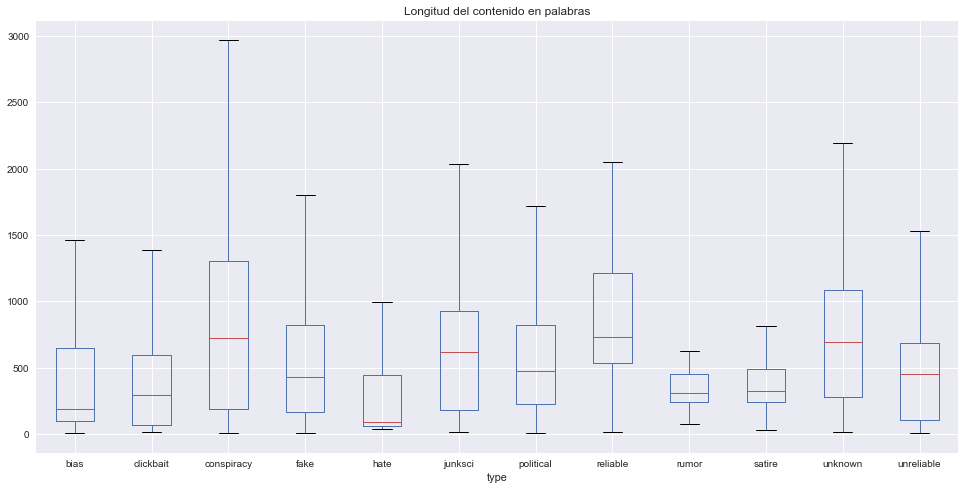

In [85]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['len_content'], by='type', ax=ax, showfliers=False)
plt.title("Longitud del contenido en palabras")
plt.suptitle("")

In [86]:
news = news.drop(["clean_content", "clean_title","len_content"], axis=1)

### Longitud en frases de las noticias

In [87]:
news['len_content'] = news.swifter.apply(lambda row: len(row['content'].split(". ")), axis=1)

Pandas Apply: 100%|██████████| 19275/19275 [00:00<00:00, 36091.64it/s]


Text(0.5, 0.98, '')

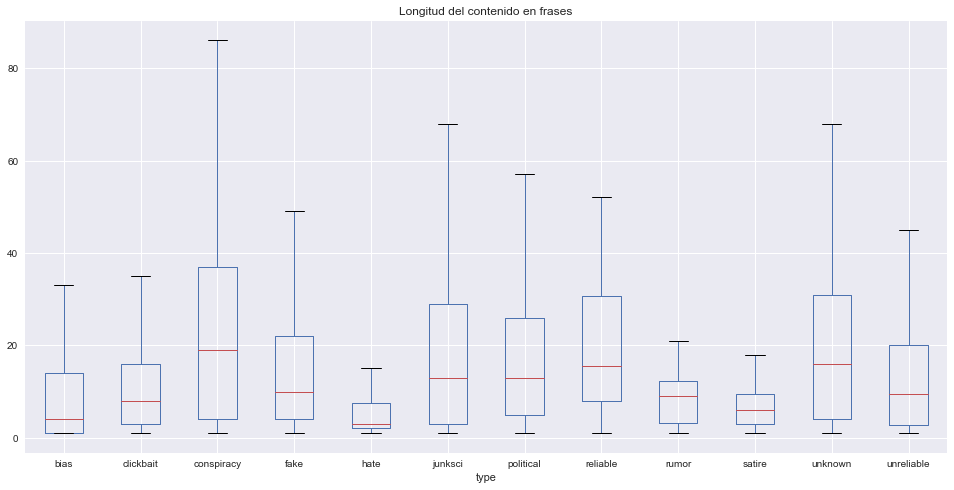

In [89]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['len_content'], by='type', ax=ax, showfliers=False)
plt.title("Longitud del contenido en frases")
plt.suptitle("")

### Signos de exclamación/interrogación por tipos de noticias

In [112]:
news['len_content'] = news.content.str.count("!|\?")

Text(0.5, 0.98, '')

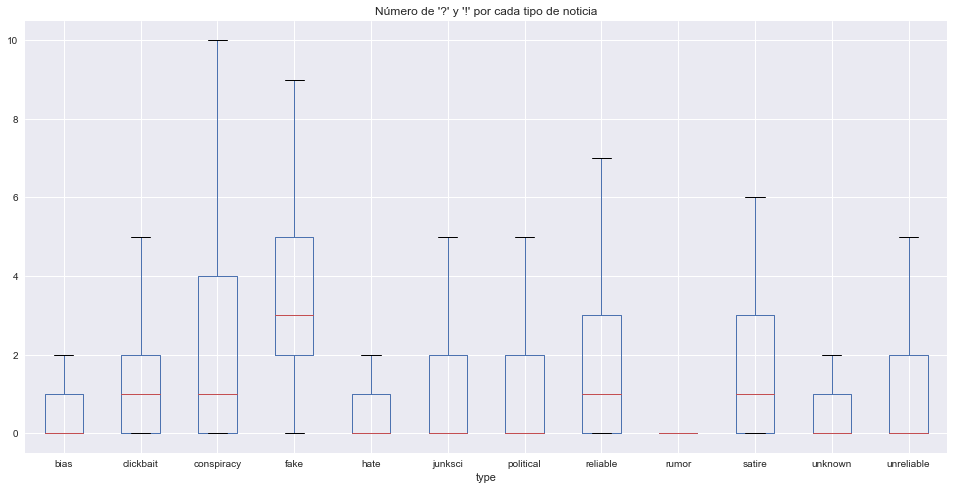

In [114]:
fig, ax = plt.subplots(1,1, figsize=(16,8))
news.boxplot(column=['len_content'], by='type', ax=ax, showfliers=False)
plt.title("Número de '?' y '!' por cada tipo de noticia")
plt.suptitle("")